In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Import Data

In [233]:
df=pd.read_csv("hyundi.csv")

In [234]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


## Check dataset size

In [235]:
df.shape

(4860, 9)

## Find and treat missing values (If any)

In [236]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [237]:
df.duplicated().sum()

86

In [238]:
df.drop_duplicates(inplace = True)

In [239]:
df.shape

(4774, 9)

In [240]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep = "\n")

model
[' Accent' ' Amica' ' Getz' ' I10' ' I20' ' I30' ' I40' ' I800' ' IX20'
 ' IX35' ' Ioniq' ' Kona' ' Santa Fe' ' Terracan' ' Tucson' ' Veloster']


year
[2000 2002 2003 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


price
[ 1200  1295  1395 ... 40365 43995 92000]


transmission
['Automatic' 'Manual' 'Other' 'Semi-Auto']


mileage
[     1      2      4 ... 125968 130000 138000]


fuelType
['Diesel' 'Hybrid' 'Other' 'Petrol']


tax(£)
[  0  20  30 115 120 125 135 140 145 150 160 165 190 200 205 235 240 260
 265 300 305 325 330 555]


mpg
[  1.1  28.   28.8  30.4  31.7  32.8  33.6  34.   34.5  34.9  35.3  35.8
  36.2  37.2  37.7  38.2  38.7  39.2  39.8  40.4  40.9  41.5  42.2  42.8
  43.5  43.6  44.1  44.8  45.6  46.   46.3  47.1  47.9  48.7  49.6  50.4
  51.4  52.3  53.3  54.3  55.4  56.5  57.6  57.7  58.9  60.1  61.4  61.7
  62.8  64.2  65.7  67.3  68.9  70.6  72.4  74.3  76.3  78.4  78.5 256.8]


engineSize
[0.  1.  1.1 1.2 1.3 1.4 1.6 1.7 2.  

## Check column types and describe which columns are numerical or categorical

In [241]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [242]:
df.rename(columns={'mileage': 'total_driven'}, inplace=True)

In [243]:
#Separating categorical and numerical columns
cat=[]
num=[]

for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

In [244]:
cat

['model', 'transmission', 'fuelType']

In [245]:
num

['year', 'price', 'total_driven', 'tax(£)', 'mpg', 'engineSize']

## Perform Univariate analysis

In [246]:
df.describe()

,year,price,total_driven,tax(£),mpg,engineSize
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000
mean,2017.092166,12727.809384,21658.914537,121.187683,53.837956,1.460285
std,1.921323,5976.925227,17618.489657,58.135472,12.740499,0.401858
min,2000.000000,1200.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.000000,8542.500000,125.000000,44.800000,1.200000
50%,2017.000000,11992.500000,17627.000000,145.000000,55.400000,1.600000
75%,2018.000000,15695.000000,31067.500000,145.000000,60.100000,1.700000
max,2020.000000,92000.000000,138000.000000,555.000000,256.800000,2.900000


In [247]:
df.corr()

C:\Users\zamam\AppData\Local\Temp\ipykernel_4252\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,total_driven,tax(£),mpg,engineSize
year,1.000000,0.575325,-0.716930,0.265990,-0.179730,-0.034279
price,0.575325,1.000000,-0.443754,0.318448,-0.323742,0.521832
total_driven,-0.716930,-0.443754,1.000000,-0.202304,0.179206,0.177276
tax(£),0.265990,0.318448,-0.202304,1.000000,-0.453649,0.224318
mpg,-0.179730,-0.323742,0.179206,-0.453649,1.000000,-0.215255
engineSize,-0.034279,0.521832,0.177276,0.224318,-0.215255,1.000000


There is a positive correlation of approximately 0.58 between the year of the vehicle and its price. This suggests that newer vehicles tend to have higher prices.

There is a negative correlation of around -0.44 between the price of the vehicle and its total driven distance. This suggests that vehicles with higher prices tend to have been driven less.

There is a positive correlation of about 0.32 between the price of the vehicle and its tax amount. Higher-priced vehicles might have higher tax amounts.

There is a negative correlation of approximately -0.32 between the price of the vehicle and its miles per gallon value. This implies that vehicles with higher prices might have lower fuel efficiency.

There is a strong positive correlation of around 0.52 between the price of the vehicle and its engine size. This suggests that vehicles with larger engine sizes tend to have higher prices.

In [248]:
df.head()

,model,year,price,transmission,total_driven,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


### Plot histogram for a few categorical variables

In [249]:
df['model'].value_counts()

 Tucson      1280
 I10         1061
 I30          535
 I20          487
 Kona         322
 Ioniq        275
 Santa Fe     244
 IX20         202
 I40          120
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: model, dtype: int64

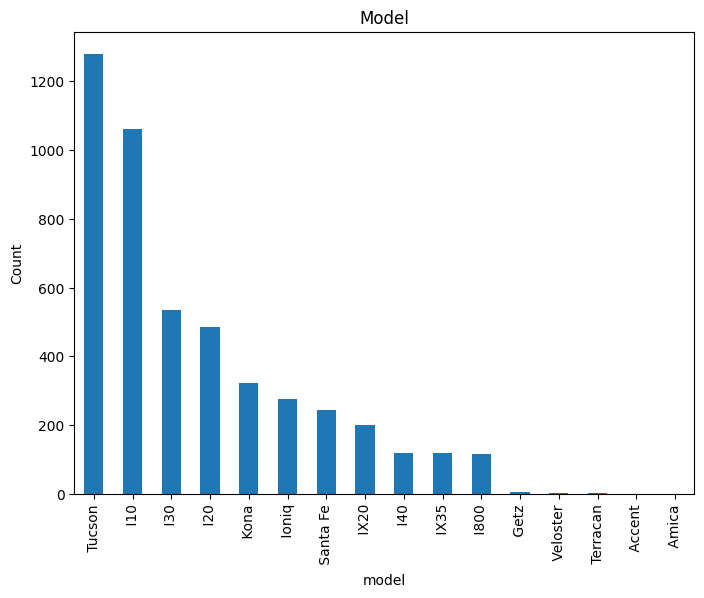

In [250]:
# Plot for model

plt.figure(figsize=(8, 6))
df['model'].value_counts().plot(kind='bar')
plt.title('Model')
plt.xlabel('model')
plt.ylabel('Count')
plt.show()

In [251]:
df['transmission'].value_counts()

Manual       3546
Automatic     658
Semi-Auto     568
Other           2
Name: transmission, dtype: int64

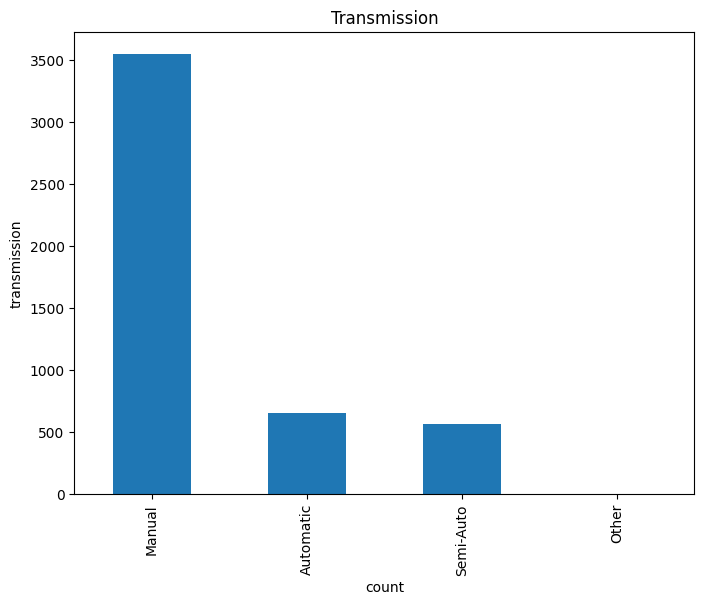

In [252]:
# Plot for transmission 
plt.figure(figsize=(8, 6))
df['transmission'].value_counts().plot(kind='bar')
plt.title('Transmission')
plt.xlabel('count')
plt.ylabel('transmission')
plt.show()

In [253]:
df['fuelType'].value_counts()

Petrol    2838
Diesel    1595
Hybrid     340
Other        1
Name: fuelType, dtype: int64

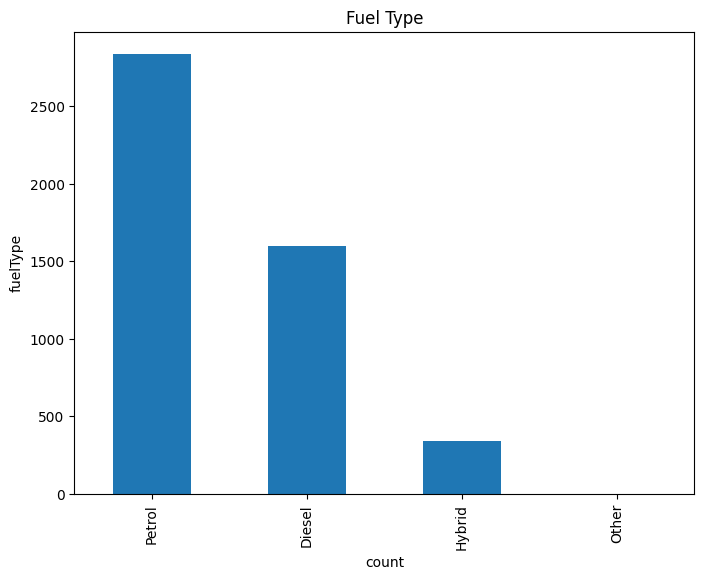

In [254]:
# Plot for fuelType

plt.figure(figsize=(8, 6))
df['fuelType'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt.xlabel('count')
plt.ylabel('fuelType')
plt.show()

## Check the distribution of numerical variables

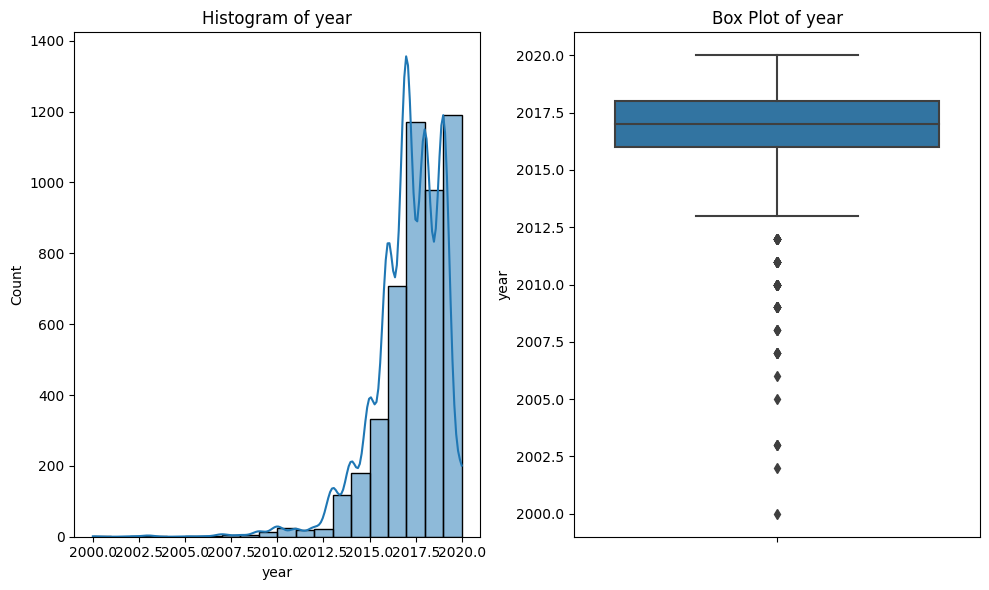

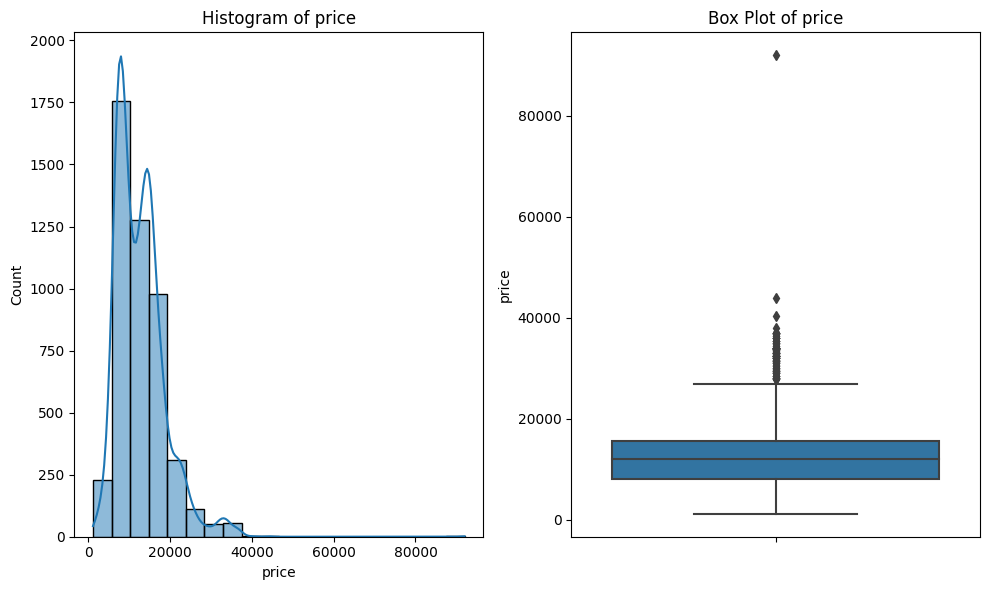

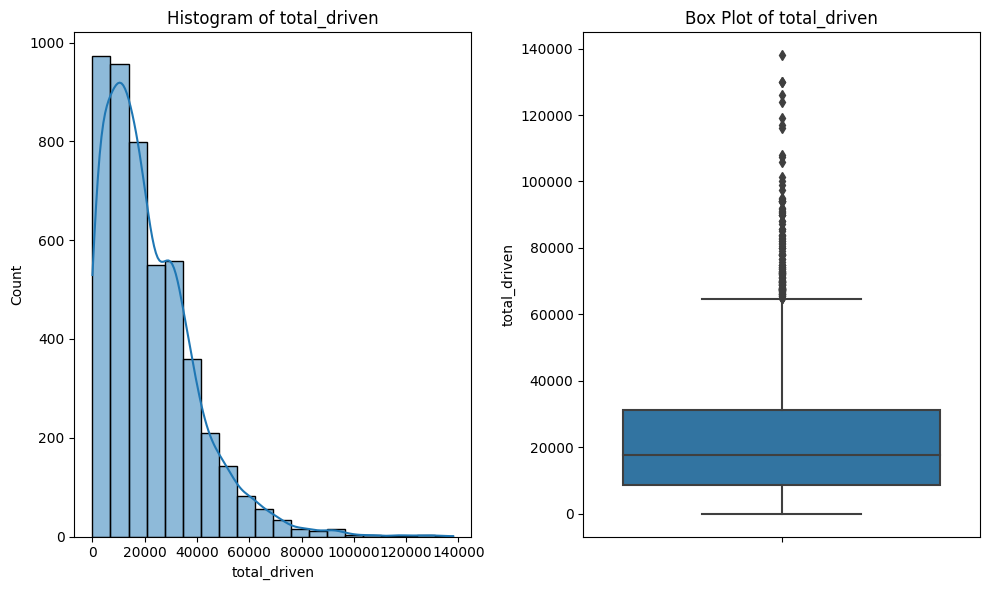

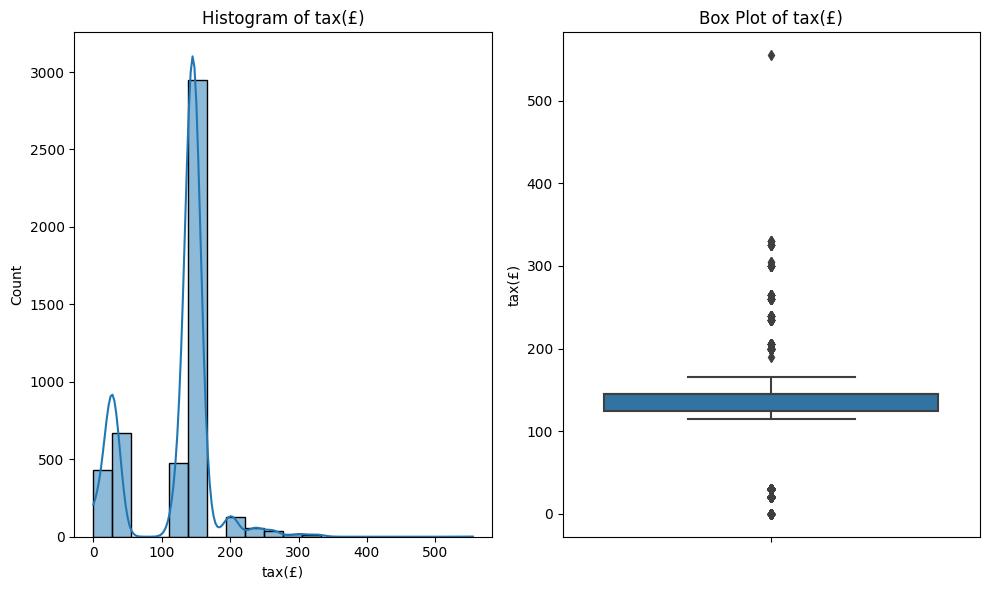

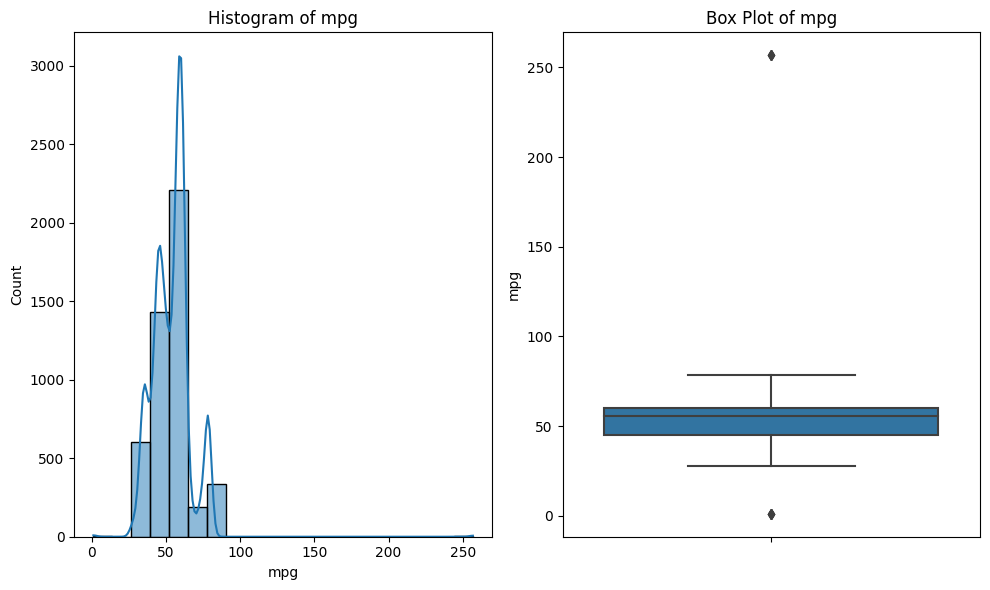

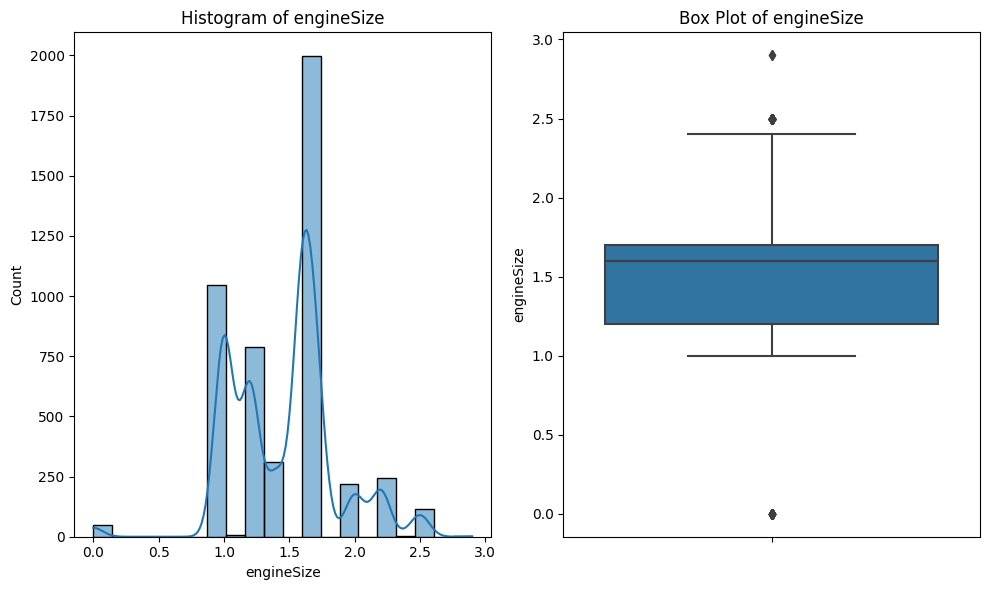

In [255]:
for column in num:
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

* After seeing the distributiopn of numerical columns we found that there are outliers in the dataset, we have to perform outlier analysis in the data.

# Outlier Analysis

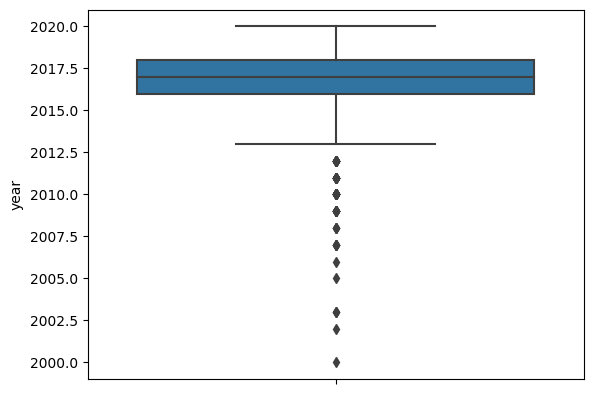

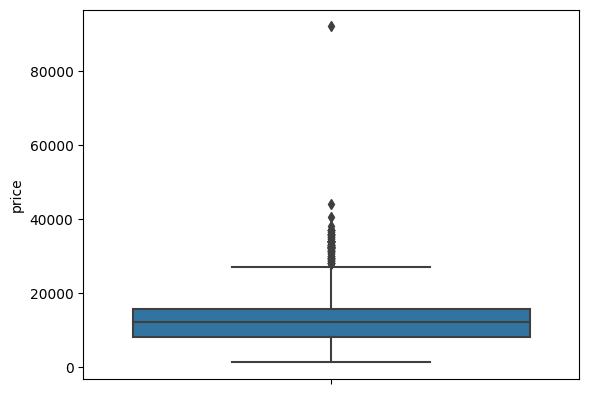

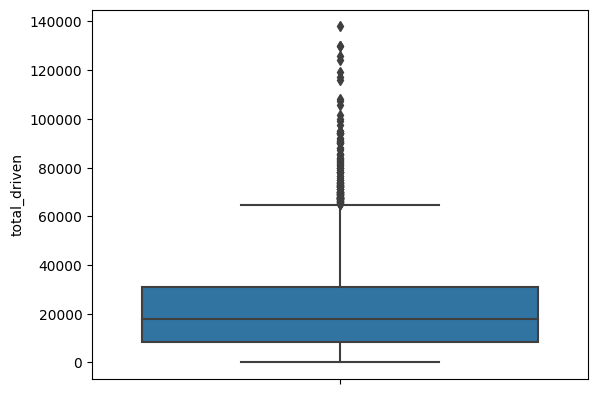

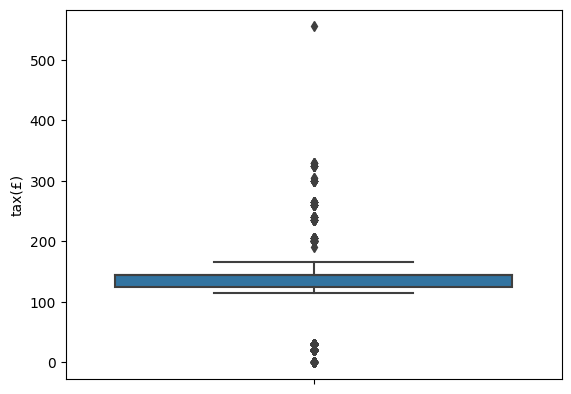

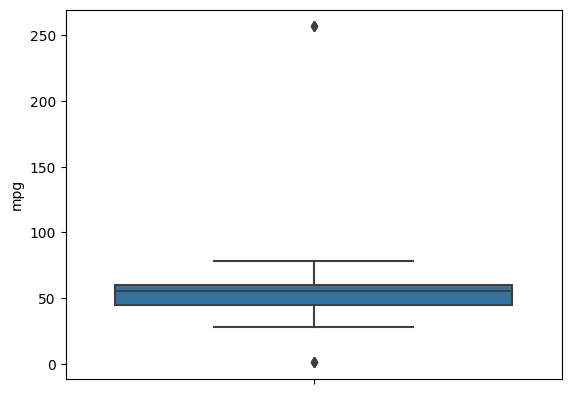

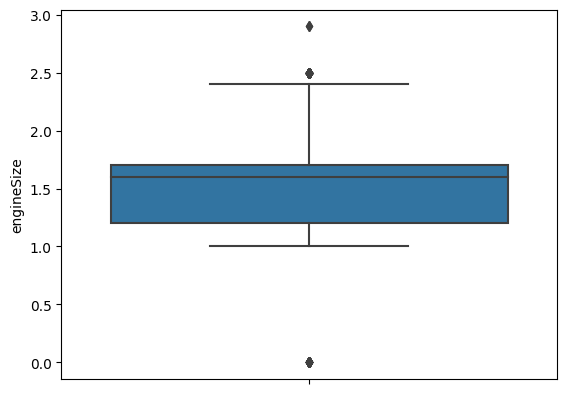

In [256]:
for i in num:
    plt.figure()
    sns.boxplot(data = df, y = i)

In [257]:
for i in num:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + (1.5*iqr)
    ll = q1 - (1.5*iqr)
    
    for j in df[i]:
        if j>ul:
            df[i] = df[i].replace(j, ul)
        elif j<ll:
            df[i] = df[i].replace(j, ll)

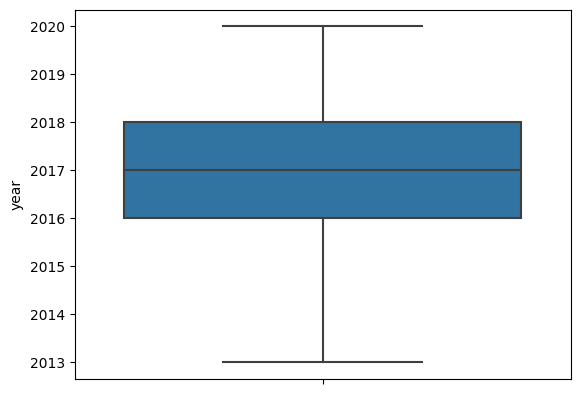

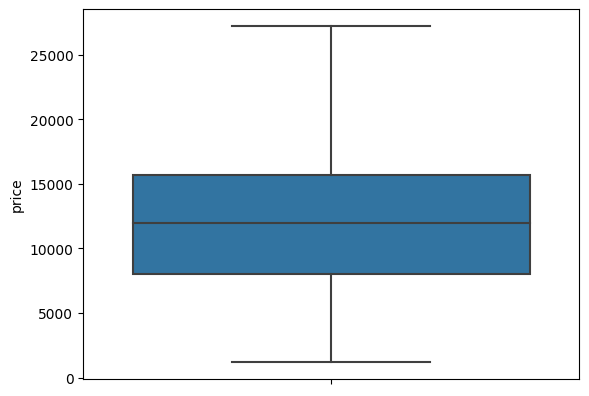

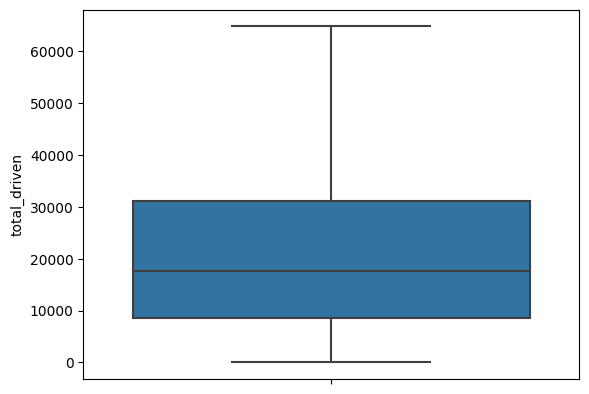

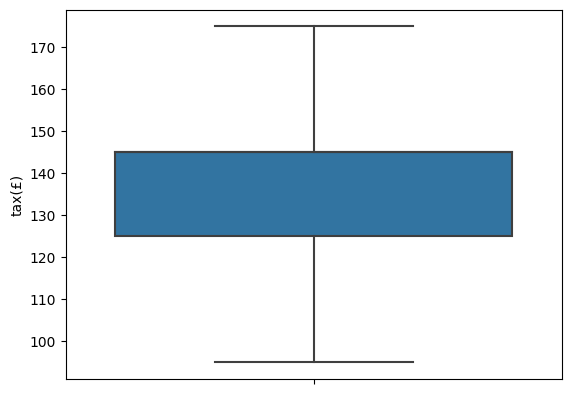

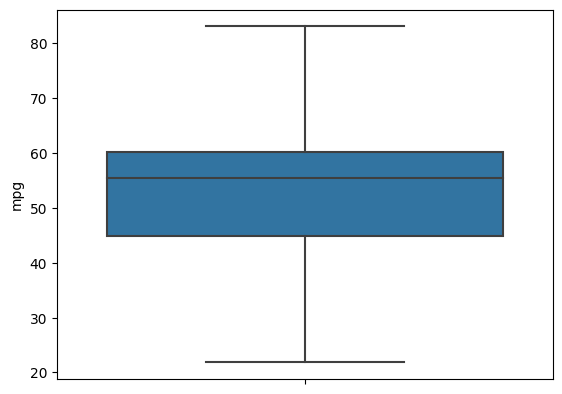

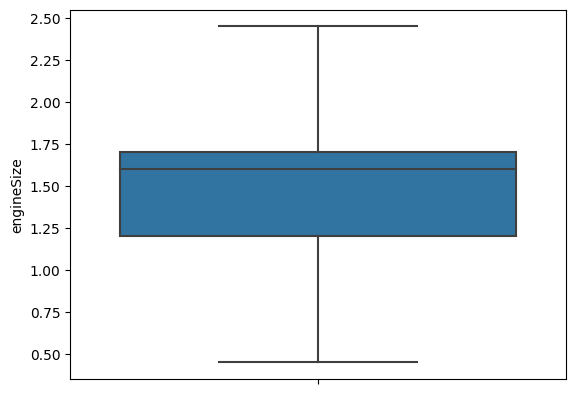

In [258]:
for i in num:
    plt.figure()
    sns.boxplot(data = df, y = i)

## Perform Bivariate analysis

### Plot pair plots

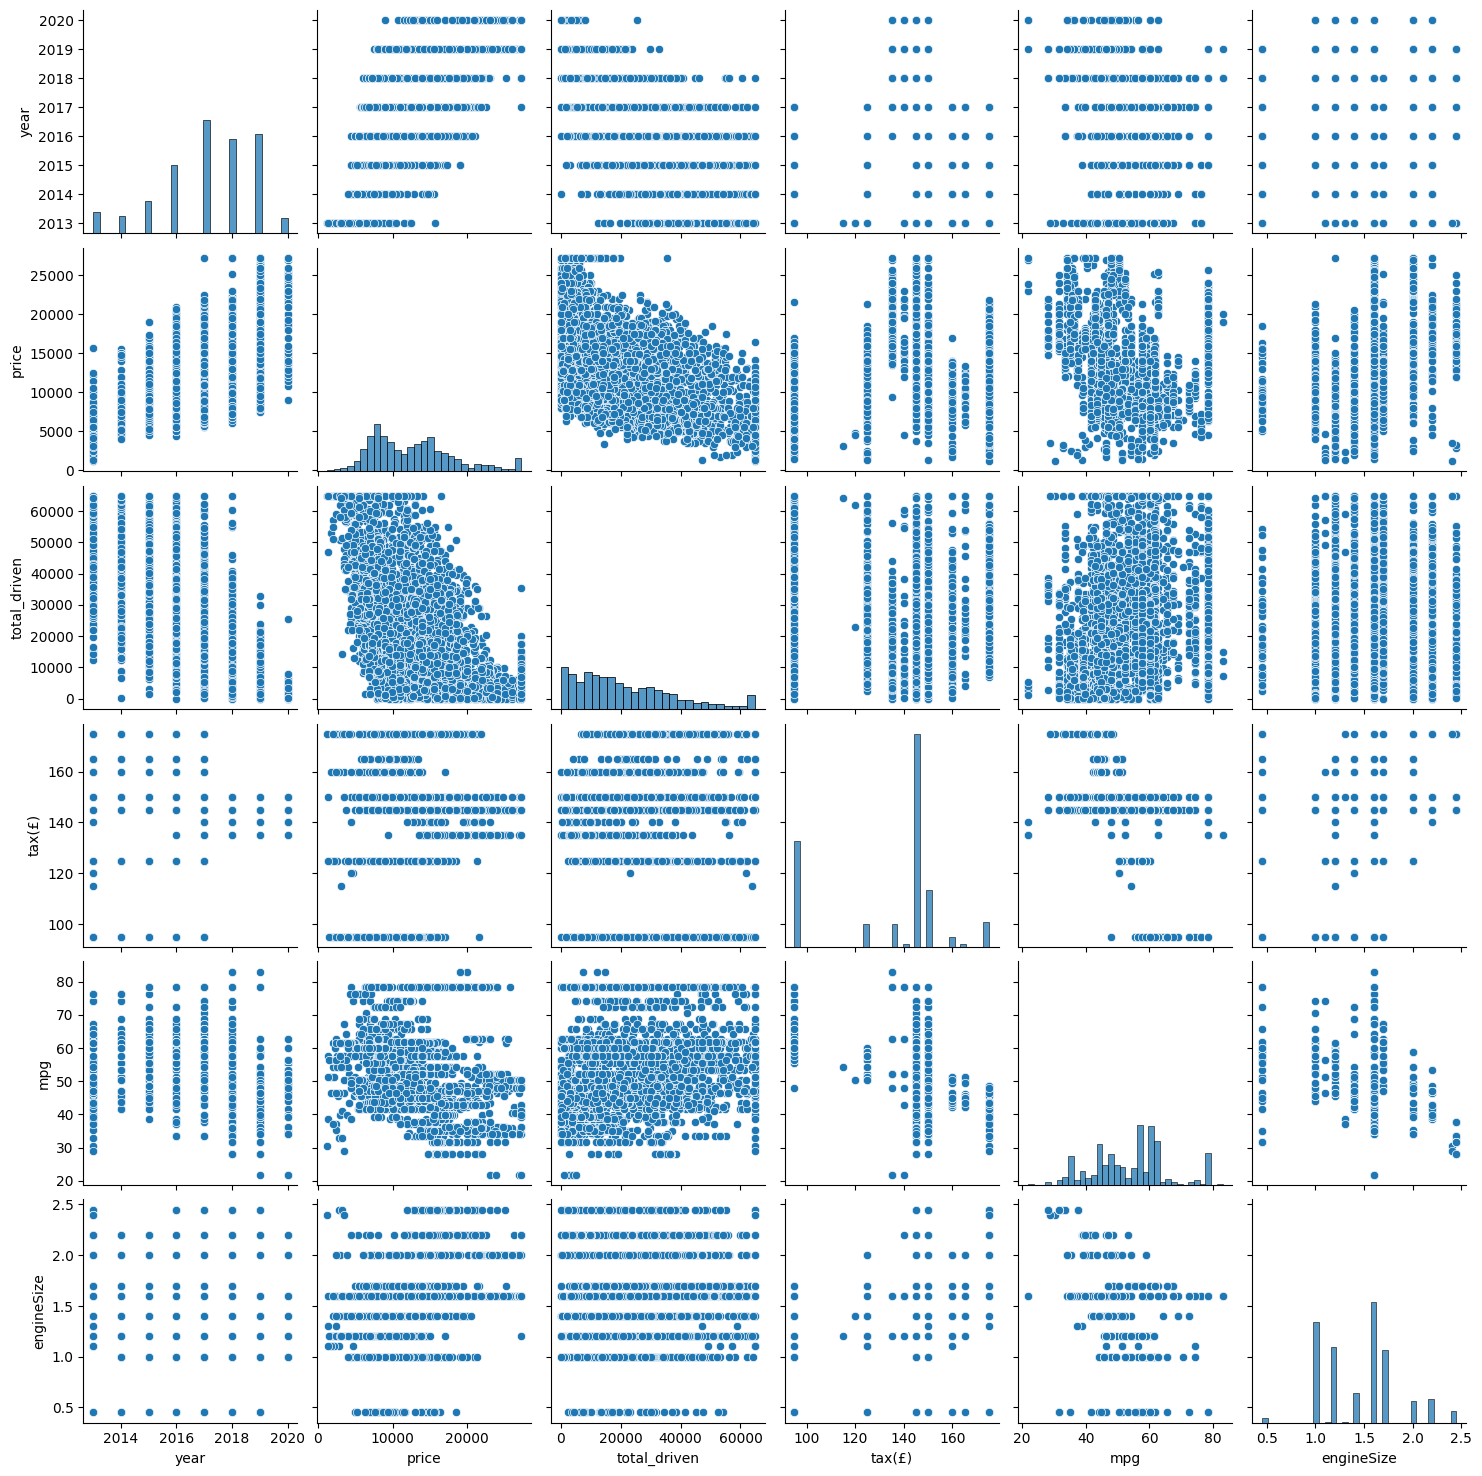

In [259]:
sns.pairplot(df)
plt.show()

## Perform a Chi-square analysis to check whether there is a relationship between
### Transmission and FuelType
### FuelType and Model


In [260]:
# Chi-square analysis between transmission and fuelType
cross_tab1 = pd.crosstab(df['transmission'], df['fuelType'])
chi2, p_value, _, _ = chi2_contingency(cross_tab1)
print("Chi-square analysis between transmission and fuelType:")
print("p-value:", p_value)

# Chi-square analysis between fuelType and model
cross_tab2 = pd.crosstab(df['fuelType'], df['model'])
chi2, p_value, _, _ = chi2_contingency(cross_tab2)
print("Chi-square analysis between fuelType and model:")
print("p-value:", p_value)

Chi-square analysis between transmission and fuelType:
p-value: 0.0
Chi-square analysis between fuelType and model:
p-value: 0.0


* The p-value being close to 0 suggests that there is a significant association between the transmission and FuelType variables. This implies that the distribution of transmission types is not independent of the distribution of Fuel types, and they are related in some way.

* Similarly, the p-value being close to 0 suggests a significant association between FuelType and model. This indicates that the distribution of Fuel types is not independent of the distribution of vehicle models.

Chi-square analysis between Transmission and FuelType:
Chi-square value: 1701.3676934890989
p-value: 0.0


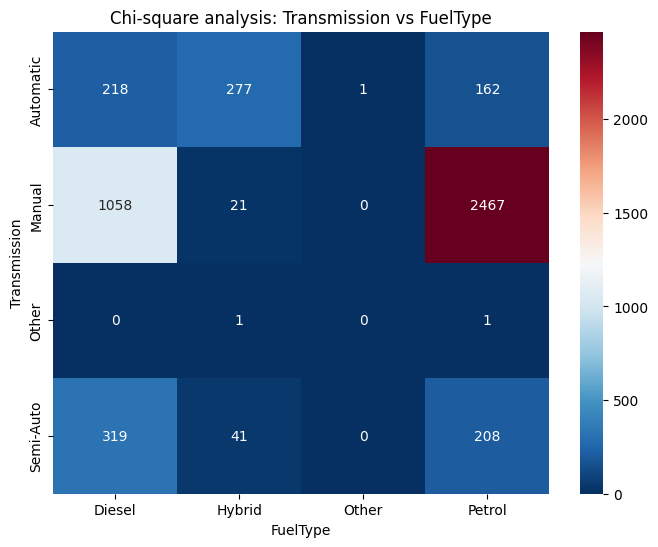

Chi-square analysis between FuelType and Model:
Chi-square value: 6337.2810088642855
p-value: 0.0


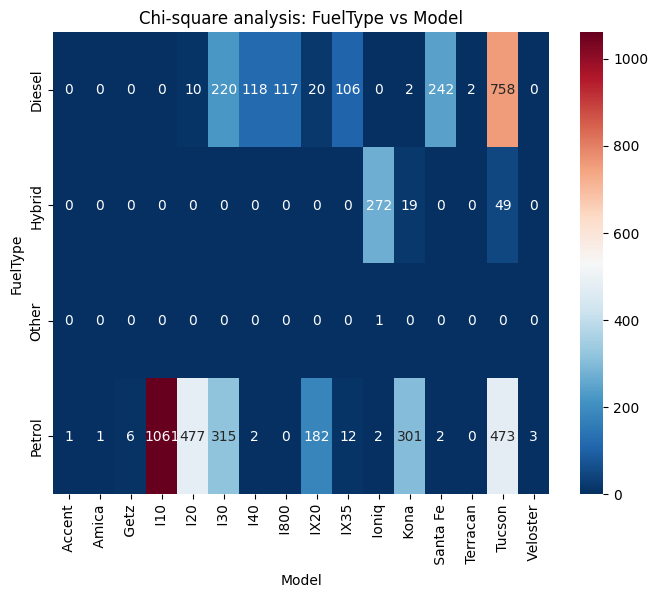

In [261]:
cross_tab1 = pd.crosstab(df['transmission'], df['fuelType'])
chi2, p_value, _, _ = chi2_contingency(cross_tab1)
print("Chi-square analysis between Transmission and FuelType:")
print("Chi-square value:", chi2)
print("p-value:", p_value)

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab1, annot=True, fmt="d", cmap="RdBu_r")
plt.title("Chi-square analysis: Transmission vs FuelType")
plt.xlabel("FuelType")
plt.ylabel("Transmission")
plt.show()


cross_tab2 = pd.crosstab(df['fuelType'], df['model'])
chi2, p_value, _, _ = chi2_contingency(cross_tab2)
print("Chi-square analysis between FuelType and Model:")
print("Chi-square value:", chi2)
print("p-value:", p_value)

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab2, annot=True, fmt="d", cmap="RdBu_r")
plt.title("Chi-square analysis: FuelType vs Model")
plt.xlabel("Model")
plt.ylabel("FuelType")
plt.show()

### Calculate Pearson correlation, and plot their heatmap

C:\Users\zamam\AppData\Local\Temp\ipykernel_4252\3600714942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


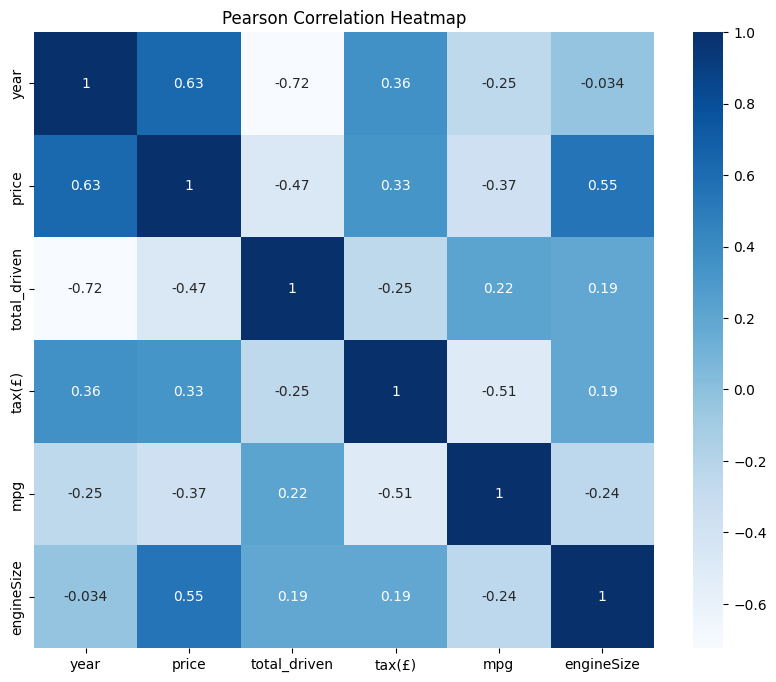

In [262]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Pearson Correlation Heatmap')
plt.show()

### Drop any unnecessary columns

In [263]:
df.drop("model", axis = 1, inplace = True)

In [264]:
df.head()

,year,price,transmission,total_driven,fuelType,tax(£),mpg,engineSize
0,2017,7999.0,Manual,17307,Petrol,145,58.9,1.2
1,2016,14499.0,Automatic,25233,Diesel,175,43.5,2.0
2,2016,11399.0,Manual,37877,Diesel,95,61.7,1.7
3,2016,6499.0,Manual,23789,Petrol,95,60.1,1.0
4,2015,10199.0,Manual,33177,Diesel,160,51.4,2.0


### One hot encode categorical variables (if any)

In [265]:
OHE=["fuelType","transmission"]

In [266]:
df = pd.get_dummies(df, columns= OHE, drop_first= True)

### Scaling

In [267]:
sc=StandardScaler()

In [268]:
df[num]=sc.fit_transform(df[num])

In [269]:
df.head()

,year,price,total_driven,tax(£),mpg,engineSize,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,-0.093687,-0.842844,-0.243706,0.443036,0.442827,-0.685381,0,0,1,1,0,0
1,-0.688453,0.353507,0.245309,1.721788,-0.880367,1.396794,0,0,0,0,0,0
2,-0.688453,-0.217060,1.025413,-1.688216,0.683407,0.615978,0,0,0,1,0,0
3,-0.688453,-1.118925,0.156217,-1.688216,0.545933,-1.205924,0,0,1,1,0,0
4,-1.283219,-0.437925,0.735434,1.082412,-0.201586,1.396794,0,0,0,1,0,0


In [270]:
df.dtypes

year                      float64
price                     float64
total_driven              float64
tax(£)                    float64
mpg                       float64
engineSize                float64
fuelType_Hybrid             uint8
fuelType_Other              uint8
fuelType_Petrol             uint8
transmission_Manual         uint8
transmission_Other          uint8
transmission_Semi-Auto      uint8
dtype: object

### Split into train and test set

In [271]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (3819, 11) (3819,)
Test set shape: (955, 11) (955,)


## Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.

In [272]:
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svr = SVR()

In [273]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [274]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [275]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [276]:
svr.fit(X_train, y_train)

SVR()

In [277]:
lr_predictions = linear_regression.predict(X_test)
lr_predictions 

array([-6.41258270e-01,  6.92796636e-01,  2.08903374e+00, -4.93489689e-01,
       -1.13098236e-01,  1.04305237e-01,  2.57270295e-01, -8.54627357e-01,
        4.84295083e-01, -8.88392186e-01,  4.50878700e-03, -1.03010392e-01,
        1.12463602e+00, -9.87024150e-02,  2.59777338e-01, -2.93597831e-01,
       -1.28649831e+00, -6.74531699e-01, -1.24184750e+00,  5.78040740e-01,
       -1.96224617e+00,  9.71332231e-02, -1.56197240e+00, -9.25120868e-01,
        8.52676882e-01,  1.51757033e-01, -1.32137238e+00,  1.70394676e-02,
       -1.25928572e+00, -3.95165506e-01,  1.24751859e+00, -6.77352764e-02,
       -1.22957292e+00, -9.25753505e-02,  2.91665013e-01, -1.08524546e+00,
        1.10067421e-01, -6.19484128e-01, -4.36161828e-02,  2.65343166e-01,
       -6.28111585e-01, -3.83264599e-01, -4.38793428e-01,  9.44616344e-01,
       -3.77069416e-01, -5.68466333e-01, -3.73190307e-01, -6.91614809e-01,
        7.33350470e-01, -5.33785097e-01,  1.30283380e+00, -2.70334307e-01,
       -8.62091630e-01, -

In [278]:
dt_predictions = decision_tree.predict(X_test)
dt_predictions

array([ 1.43850522e+00,  8.48796241e-01,  1.07702319e+00, -8.43028033e-01,
       -3.45714153e-01, -1.61844217e-01,  1.29145141e-01, -4.76392486e-01,
        1.68716748e-01, -9.16281521e-01,  1.69268910e-01, -4.01114404e-01,
        1.03377050e+00, -4.29090610e-01, -3.65960092e-01, -2.24238520e-01,
       -1.28623004e+00, -8.43580195e-01, -1.21076790e+00,  4.44797733e-01,
       -1.40402459e+00,  2.06447816e-01, -1.15555171e+00, -8.79838831e-01,
        6.28851723e-01,  4.42957193e-01, -1.30371517e+00,  6.09526054e-01,
       -1.21095196e+00,  4.45718003e-01,  1.06229887e+00, -1.44169714e-02,
       -1.11966118e+00, -8.85176397e-01,  1.23623521e-01, -1.04695985e+00,
        3.52770738e-01, -5.14118233e-02,  2.61295905e-01,  2.05527546e-01,
       -9.19042331e-01, -7.51553200e-01, -2.91418226e-01,  1.27258055e+00,
       -2.01231771e-01, -5.73941100e-01, -6.23635677e-01, -9.36527460e-01,
        4.44797733e-01,  1.67796478e-01,  1.91630938e+00, -4.19519803e-01,
       -1.04051796e+00, -

In [279]:
rf_predictions = random_forest.predict(X_test)
rf_predictions

array([ 1.28818602e+00,  7.88818567e-01,  1.09853726e+00, -8.12789803e-01,
       -4.23467761e-01, -1.28278291e-01,  2.22869113e-01, -4.50488727e-01,
        3.51885438e-01, -9.42183439e-01,  2.53777300e-01, -5.31132903e-01,
        1.04365604e+00, -4.88847419e-01, -4.05137824e-01, -7.18142081e-02,
       -1.21235629e+00, -8.35722930e-01, -1.28088879e+00,  2.14173965e-01,
       -1.49383742e+00,  1.62083443e-01, -1.20309791e+00, -9.58777747e-01,
        6.18702986e-01,  4.18367580e-01, -1.30185991e+00,  5.04394415e-01,
       -1.25792622e+00,  1.86886558e-01,  1.07979872e+00,  4.48244863e-02,
       -1.13296092e+00, -7.97432338e-01,  1.65538136e-01, -1.06966475e+00,
        3.17404764e-01, -4.11636972e-02,  2.45058662e-01,  3.53721596e-01,
       -9.42818425e-01, -7.33644747e-01, -3.63412785e-01,  1.18102029e+00,
       -1.93630341e-01, -6.73893460e-01, -6.72595879e-01, -8.47255753e-01,
        5.79206840e-01,  2.53863805e-01,  1.89396400e+00, -3.44644799e-01,
       -1.02658508e+00, -

In [280]:
svr_predictions = svr.predict(X_test)
svr_predictions

array([ 5.97020446e-01,  6.88533524e-01,  1.11182781e+00, -8.16800990e-01,
       -5.03895716e-01,  7.52413891e-02,  2.12318439e-01, -5.78085400e-01,
        4.44967432e-01, -9.09425829e-01,  3.10526451e-01, -5.38844830e-01,
        1.16843935e+00, -4.88320635e-01, -4.78705190e-02, -4.08473231e-02,
       -1.16173552e+00, -9.22172051e-01, -1.17451343e+00,  3.83911476e-01,
       -1.57732862e+00,  8.36874590e-02, -1.32867298e+00, -1.00128407e+00,
        7.45861097e-01,  4.48524983e-01, -1.21106601e+00,  1.05863433e-01,
       -1.18297992e+00, -1.51075572e-01,  1.24236071e+00, -3.59408250e-01,
       -1.13319706e+00, -2.14059271e-01,  2.34759349e-01, -1.05469257e+00,
        1.96605599e-01, -2.76325137e-01,  3.13375421e-01,  3.73039721e-01,
       -9.06515941e-01, -8.70299575e-01, -5.99493128e-01,  1.02569191e+00,
       -2.76820373e-01, -5.29870923e-01, -6.34401950e-01, -7.09850010e-01,
        8.32825393e-01, -1.52000089e-01,  1.81098722e+00, -1.99264016e-01,
       -8.90223231e-01, -

## Check their performance, and comment on which is the best model

In [281]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [282]:
models = [
    ("Linear Regression", linear_regression),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("SVR", svr)
]

for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("")

Model: Linear Regression
MSE: 0.17
MAE: 0.31
R-squared: 0.83

Model: Decision Tree
MSE: 0.07
MAE: 0.18
R-squared: 0.93

Model: Random Forest
MSE: 0.05
MAE: 0.15
R-squared: 0.95

Model: SVR
MSE: 0.06
MAE: 0.19
R-squared: 0.94



* We can see above that the value of MSE and MAE is lowestest and R-squared is closer to 1 in Random Forest, so it is better fit model for the data.

## Use Grid Search CV to tune the hyperparameter of the best model

In [283]:
n_estimators = [20,60,100,120]

max_features = [0.2,0.6,1.0]

max_depth = [2,8,None]

max_samples = [0.5,0.75,1.0]

In [284]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth' : max_depth,
             'max_samples' : max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [285]:
random_forest_grid = GridSearchCV(estimator = random_forest,
                                 param_grid = param_grid,
                                 cv = 5,
                                 verbose = 2,
                                 n_jobs = -1)

In [286]:
random_forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [287]:
random_forest_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.5,
 'n_estimators': 100}

In [288]:
print(f'Train Accuracy - : {random_forest_grid.score(X_train, y_train):.2f}')
print(f'Test Accuracy - : {random_forest_grid.score(X_test, y_test):.2f}')

Train Accuracy - : 0.98
Test Accuracy - : 0.96


High train accuracy suggests that model has learned the patterns and relationships in the training data very well.

High test accuracy indicates that model is generalizing well to new data and is not overfitting.

Hyperparameter tuning is done to attain best accuracy, and here the data set is small that's why we have used Grid Search CV.

## Random Search CV

In [295]:
n_estimators = [20,60,100,120]

max_features = [0.2,0.6,1.0]

max_depth = [2,8,None]

max_samples = [0.5,0.75,1.0]

min_samples_split = [2,5]

min_samples_leaf = [1,2]

In [296]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth' : max_depth,
             'max_samples' : max_samples,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [297]:
random_forest_grid = RandomizedSearchCV(estimator = random_forest,
                                 param_distributions = param_grid,
                                 cv = 5,
                                 verbose = 2,
                                 n_jobs = -1)

In [298]:
random_forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [299]:
random_forest_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 0.6,
 'max_depth': None}

In [300]:
print(f'Train Accuracy - : {random_forest_grid.score(X_train, y_train):.2f}')
print(f'Test Accuracy - : {random_forest_grid.score(X_test, y_test):.2f}')

Train Accuracy - : 0.97
Test Accuracy - : 0.96


High train accuracy suggests that the model has learned the training data well and can potentially memorize the data.

High test accuracy suggests that the model is performing well on new data and is not overfitting the training data.

Random Search CV is done to attain the best accuracy in less time.

## Train a polynomial regression model with degrees 2, and 3 and compare its performance with other models

In [301]:
poly_degrees = [2, 3]
for degree in poly_degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Polynomial Regression (Degree {degree})")
    print(f"MSE: {mse_poly:.2f}")
    print(f"MAE: {mae_poly:.2f}")
    print(f"R-squared: {r2_poly:.2f}")
    print("")

Polynomial Regression (Degree 2)
MSE: 0.10
MAE: 0.24
R-squared: 0.90

Polynomial Regression (Degree 3)
MSE: 0.08
MAE: 0.21
R-squared: 0.92



Polynomial Regression models (Degree 2 and Degree 3) have competitive performance, especially in terms of R-squared, but they have slightly higher errors compared to Random Forest and Decision Tree models. When choosing the best model for specific use case, we should consider a balance between predictive accuracy and model complexity, as more complex models like Polynomial Regression can sometimes overfit to the training data.